# Linear Regresssion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import csv
import sys


# Get the training data

In [2]:
dfx=pd.read_csv('Linear_X_Train.csv')
dfy=pd.read_csv('Linear_Y_Train.csv')

x=dfx.values
y=dfy.values


print(x.shape)
print(y.shape)

(3750, 1)
(3750, 1)


In [3]:
y

array([[-9.11011171e-02],
       [-5.34677208e+01],
       [ 7.54570088e+01],
       ...,
       [-3.49832749e+01],
       [ 1.45206092e+02],
       [-1.71244939e+01]])

# Visualise and Preprocess

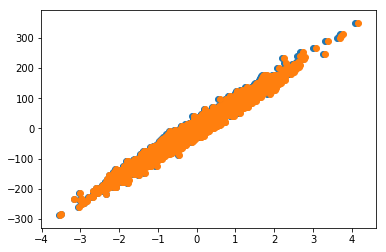

In [4]:
plt.scatter(x,y)
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y)
plt.show()

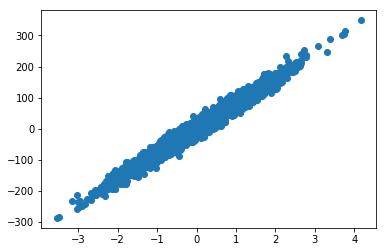

In [5]:
plt.scatter(X,Y)
plt.show()

#  Gradient Alogorithm
- Start with a random theta
- Repeat until coverage
- Update theta according to the rule

In [6]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    m=X.shape[0]
    error=0
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        error+=(hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad=np.zeros((2,))
    m=X.shape[0]
    
    for i in range(m):
        hx=hypothesis(X[i],theta)
        grad[0] += 2*(hx-Y[i])
        grad[1] += 2*(hx-Y[i])*X[i]
        
    return grad

def gradientDescent(X,Y,Learning_rate=0.0001):
    
    theta=np.zeros((2,))

    itr=0
    max_itr=50
    
    error_list=[]
    
    
    while(itr<=max_itr):
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        
        
        theta[0]=theta[0]-Learning_rate*grad[0]
        theta[1]=theta[1]-Learning_rate*grad[1]
        
        itr+=1
        
    return theta,error_list
        
    

In [7]:
final_theta,error_list=gradientDescent(x,y)

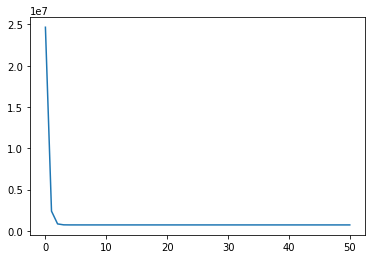

In [8]:
plt.plot(error_list)
plt.show()

In [9]:
print(final_theta)

[ 3.72798828 80.54363185]


### Plot the line for testing data

In [10]:
xtest=pd.read_csv("Linear_X_Test.csv")


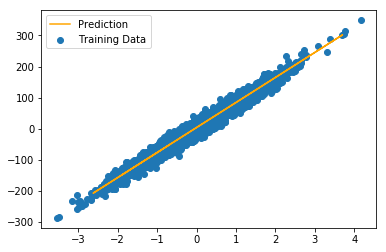

In [11]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()


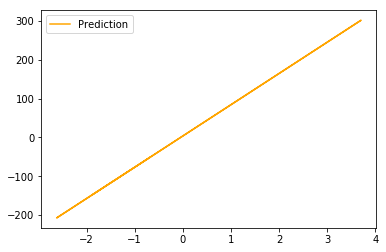

In [12]:
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()

In [13]:
yans=hypothesis(xtest,final_theta)

In [14]:
yans.head()

,x
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044960
4,51.329285


In [15]:
df_concat = pd.concat([xtest,yans], axis=1)

In [16]:
df_concat.columns = ['time','score']

In [17]:
df_concat.head()

,time,score
0,-1.877944,-147.528475
1,-0.869032,-66.266998
2,-2.530182,-200.062093
3,2.760205,226.044960
4,0.591000,51.329285


In [18]:
yans.head()

,x
0,-147.528475
1,-66.266998
2,-200.062093
3,226.044960
4,51.329285


In [19]:
print(yans.shape[0])
print(xtest.shape[0])

1250
1250


In [20]:
print(xtest.values[0])

[-1.87794441]


In [42]:
with open('Sample_Submission12.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    m = yans.shape[0]
    writer.writerow(["y"])
    for i in range(m):
        l = yans.values[i]
        writer.writerow(l)
    
    csvFile.close()

In [43]:
ans=pd.read_csv("Sample_Submission12.csv")

In [44]:
print(ans)

               y
0    -147.528475
1     -66.266998
2    -200.062093
3     226.044960
4      51.329285
5    -100.624379
6     -12.125254
7      27.252959
8     -62.454159
9    -117.213618
10    -10.669528
11      9.542993
12    -36.916575
13     68.254643
14     11.652051
15     -9.450807
16     26.494476
17    107.726360
18    177.226579
19     23.095251
20    -31.079395
21     22.188860
22    -52.495101
23   -147.007525
24     69.547784
25    110.116695
26    155.291370
27     11.834716
28     34.648178
29    -91.994879
...          ...
1220  -12.766261
1221   34.362936
1222   63.750793
1223   39.835226
1224  -90.398206
1225 -101.816274
1226   63.744913
1227 -101.360047
1228   56.629543
1229  -80.200999
1230  -85.745676
1231   25.355904
1232  -97.162094
1233   -0.252791
1234  -34.840085
1235  -71.236201
1236  -36.372666
1237  -25.176892
1238   91.532399
1239   76.163973
1240   -9.624295
1241   -0.818951
1242   89.246621
1243   31.688955
1244  -72.733128
1245   -9.808053
1246   78.8125

In [35]:
yans = pd.DataFrame(yans)

In [38]:
yans.to_csv("ss.csv",index=False)